In [2]:
# Init
import numpy as np
import pandas as pd
# Affichage complet des dataframes
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

import itertools
import io

# Librairie graphique plotly
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.tools as tls
import plotly.figure_factory as ff

In [12]:
df=pd.read_csv("./dev/machineLearning/bigData/TP2/data/fifa22.csv")
df.head(3)

/tmp/ipykernel_10126/537247722.py:1: DtypeWarning:

Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.



,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [11]:
n_sne=2000 # Limitation au 2000 premiers joueurs
df_sne = df.loc[:n_sne]
# competences_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
#                   'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
#                   'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
#                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
#                   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
#                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
#                   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

competences_ratings = ['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
                       'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
                       'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed',
                       'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                       'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                       'mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
                       'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                       'goalkeeping_reflexes','goalkeeping_speed']

# 1.1 Construire Un dataframe des compétences
df_competences=df_sne[competences_ratings].fillna(0)
df_competences.sample(10)

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
1727,84.0,52.0,68.0,75.0,68.0,67.0,74,54,42,69,33,73,63,55,66,74,86,82,87,72,87,51,86,90,48,53,80,72,70,68,39,72,72,71,69,8,10,15,12,6,0.0
1876,89.0,68.0,73.0,83.0,59.0,63.0,71,67,51,73,57,83,77,61,75,82,91,87,93,69,90,73,77,82,52,71,64,65,66,77,65,77,53,65,53,8,9,15,8,12,0.0
931,0.0,0.0,0.0,0.0,0.0,0.0,13,15,15,36,11,16,11,11,36,19,46,43,51,74,38,56,65,42,73,12,33,26,13,47,16,44,12,15,12,77,74,74,78,78,45.0
995,68.0,34.0,67.0,65.0,76.0,76.0,78,25,77,78,23,60,62,41,58,72,69,68,63,73,71,48,81,80,71,40,82,76,49,50,32,67,73,78,74,7,15,14,11,11,0.0
1687,79.0,70.0,73.0,81.0,39.0,60.0,77,67,40,77,72,83,78,69,67,82,76,81,79,72,77,74,44,72,62,70,42,34,74,68,69,74,44,38,36,11,10,6,10,5,0.0
1000,90.0,82.0,71.0,77.0,56.0,62.0,76,81,50,70,78,76,83,82,64,73,89,91,90,77,85,82,66,82,57,86,49,58,78,65,77,77,56,57,55,8,13,6,15,14,0.0
609,68.0,80.0,61.0,76.0,31.0,76.0,63,84,75,65,73,79,55,48,51,79,65,70,64,84,39,79,72,70,77,71,83,19,85,66,76,76,29,28,29,12,8,10,6,12,0.0
1069,64.0,32.0,57.0,66.0,76.0,84.0,35,23,68,75,34,61,56,34,67,72,65,64,63,78,57,52,90,92,81,29,82,77,25,44,56,70,79,77,74,8,8,8,10,5,0.0
404,56.0,40.0,60.0,62.0,82.0,76.0,51,25,82,70,30,61,51,36,69,63,50,61,52,77,51,68,81,64,81,46,78,82,44,55,39,75,82,83,80,5,3,5,4,4,0.0
882,71.0,55.0,67.0,69.0,80.0,75.0,56,51,73,74,56,65,51,46,76,70,72,71,72,79,75,59,76,78,75,55,72,84,55,68,76,79,84,77,77,13,9,15,14,7,0.0


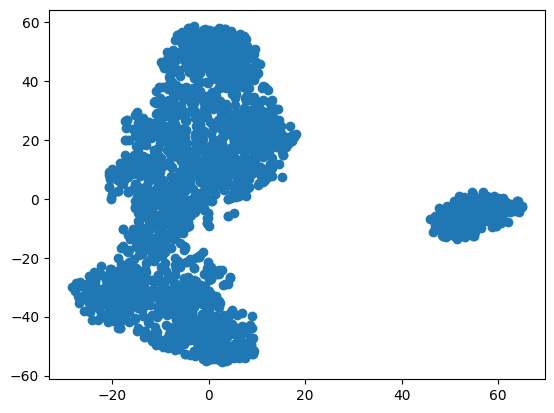

In [18]:
# 1.2 remplacer les valeurs NaN par 0 puis Exécuter une transformation T_SNE sur les données

import sklearn.manifold as sl
import matplotlib.pyplot as plt

tsne = sl.TSNE(n_components=2, perplexity=35, learning_rate=200)

competences_tsne = tsne.fit_transform(df_competences)

plt.scatter(competences_tsne[:, 0], competences_tsne[:, 1])
plt.show()

In [34]:
#1.3 Créer des filtres booléens par type de poste, puis sur les meilleurs joueurs (Overall au-dessus de 90)

attaquants=['CF', 'ST', 'LW', 'LF', 'RF','RW','RS','LS']
milieux=['LM','CAM','CDM','CM','RM','RCM','RDM','LCM','LDM','RAM']
defenseurs=['LWB','LB','CB','RB','RWB','LCB','RCB']
gardiens=['GK']

def pos2(player_positions):
    if player_positions in attaquants:
        return 'Attaquant'
    elif player_positions in milieux:
        return 'Milieu'
    elif player_positions in defenseurs:
        return 'Defenseur'
    elif player_positions in gardiens:
        return 'Gardien'
    else:
        return 'Remplaçant'
df["Position2"]=df["club_position"].apply(lambda x: pos2(x))
df["Position2"].value_counts()

best_players_per_position=df.iloc[df.groupby(df['Position2'])['overall'].idxmax()][['Position2','short_name','overall']]
best_players_per_position

,Position2,short_name,overall
0,Attaquant,L. Messi,93
15,Defenseur,V. van Dijk,89
5,Gardien,J. Oblak,91
4,Milieu,K. De Bruyne,91
26,Remplaçant,K. Navas,88


In [53]:
colors = ['navy','red','maroon','orange','green']

#1.4 Créer 4 nuages de points correspondant aux attaquants, milieux, défenseurs et gradient.

palette = {}
for index, color in enumerate(colors) :
    palette[df["Position2"].unique()[index]] = color

postes = []
y_positions = []
for i, joueur in enumerate(df):
        postes.append(df['Position2'])
        y_positions.append(i + 1)

plt.scatter([0] * len(postes), y_positions)
plt.yticks(y_positions, postes)
plt.ylim(0, len(df) + 1)
plt.show()
#tsne2 = sl.TSNE(n_components=2, learning_rate=200)
#postes_tsne = tsne2.fit_transform(df["Position2"])

#1.5 Ajouter les noms des meilleurs joueurs



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Error in callback <function _draw_all_if_interactive at 0x7f7cf9e7c1f0> (for post_execute):


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 640x480 with 1 Axes>

In [ ]:
n_kmean=18000

# Suppression des gardiens de but

df_kmean=df.loc[:n_kmean]
df_kmean=df_kmean[(df_kmean["Position"]!='GK')&(df_kmean['overall']>69)]

competences_ratings = ['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
                       'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
                       'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed',
                       'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                       'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                       'mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
                       'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                       'goalkeeping_reflexes','goalkeeping_speed']
# Création d'un joueur parfait pour savoir où il se situe

JoueurParfaitDict={'Name':'MrParfait','Overall':99}
for competence in competences_ratings:
    JoueurParfaitDict[competence]=99

df_kmean=df_kmean.append(JoueurParfaitDict,ignore_index=True)

df_competences=df_kmean[competences_ratings].fillna(0)
X=df_competences
X

In [ ]:
#2.1 Créer une division en 5 clusters des joueurs


In [ ]:
#2.2 Appliquer une PCA à 2 dimensions sur les joueurs

In [ ]:
#2.3 Afficher les clusters en couleurs sur la représentation PCA en 2D des joueurs.
# Ajouter un label pour les meilleurs joueurs (Overall au dessus de 90)

filtre_meilleurs = df_kmean["overall"]>90
kmeans_clusters=go.Scatter(x=X_projected[:,0],y=X_projected[:,1],mode='markers',
                           marker=dict(
                               size=5,
                               color=clusters.astype(np.float),
                               colorscale='Portland',
                               showscale=False
                           )
                           )
acp_meilleurs=go.Scatter(x=X_projected[filtre_meilleurs,0], y=X_projected[filtre_meilleurs,1],name='Meilleurs joueurs',
                         text=df_kmean.loc[filtre_meilleurs,'Name'],textfont=dict(family='sans serif',color='black',size=16),
                         opacity=0.9,mode='text'
                         )
data=[kmeans_clusters,acp_meilleurs]

layout = go.Layout(title="ACP + Clustering ",titlefont=dict(size=40),
                   xaxis=dict(title='F1'),
                   yaxis=dict(title='F2'),
                   autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
# 3. Qui va gagner la Ligue des champions ?
